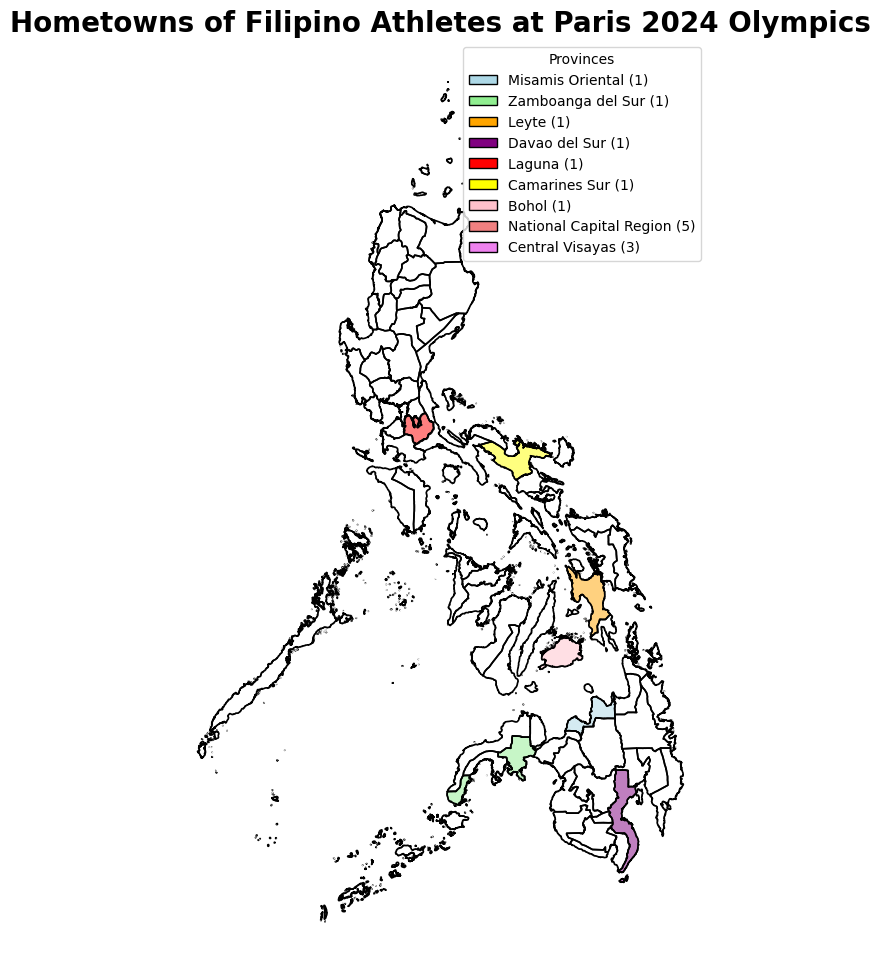

In [37]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.patches import Patch

# Load the shapefile of the Philippines
shapefile_path = "C:/Users/tmilagroso/Downloads/pythonProj/gadm41_PHL_shp/gadm41_PHL_1.shp"
gdf = gpd.read_file(shapefile_path)

# Athlete dataset
athletes_data = [
    {"Name": "EJ Obiena", "Hometown": "National Capital Region"},
    {"Name": "Carlo Paalam", "Hometown": "Misamis Oriental"},
    {"Name": "Eumir Marcial", "Hometown": "Zamboanga del Sur"},
    {"Name": "Aira Villegas", "Hometown": "Leyte"},
    {"Name": "Nesthy Petecio", "Hometown": "Davao del Sur"},
    {"Name": "Hergie Bacyadan", "Hometown": "National Capital Region"},
    {"Name": "Samantha Catantan", "Hometown": "National Capital Region"},
    {"Name": "Bianca Pagdanganan", "Hometown": "National Capital Region"},
    {"Name": "Dottie Ardina", "Hometown": "Laguna"},
    {"Name": "Carlos Yulo", "Hometown": "National Capital Region"},
    {"Name": "Kiyomi Watanabe", "Hometown": "Central Visayas"},
    {"Name": "Joanie Delgaco", "Hometown": "Camarines Sur"},
    {"Name": "John Ceniza", "Hometown": "Central Visayas"},
    {"Name": "Elreen Ando", "Hometown": "Central Visayas"},
    {"Name": "Vanessa Sarno", "Hometown": "Bohol"},
]

# Convert the athlete data to a DataFrame
athletes_df = pd.DataFrame(athletes_data)

# Define coordinates and colors for provinces
province_info = {
    "Misamis Oriental": {"coords": (124.68, 8.47), "color": "lightblue"},
    "Zamboanga del Sur": {"coords": (123.25, 7.11), "color": "lightgreen"},
    "Leyte": {"coords": (124.99, 11.25), "color": "orange"},
    "Davao del Sur": {"coords": (125.38, 7.09), "color": "purple"},
    "Laguna": {"coords": (121.2, 14.2), "color": "red"},
    "Camarines Sur": {"coords": (123.3, 13.6), "color": "yellow"},
    "Bohol": {"coords": (124.0, 9.8), "color": "pink"},
    "National Capital Region": {"coords": (120.98, 14.58), "color": "lightcoral"},
    "Central Visayas": {"coords": (123.9, 10.3), "color": "violet"},
}

# Add latitude and longitude columns to the DataFrame
athletes_df[['Longitude', 'Latitude']] = athletes_df['Hometown'].apply(lambda x: pd.Series(province_info[x]['coords']))

# Group by hometown and count athletes
hometown_counts = athletes_df['Hometown'].value_counts().reset_index()
hometown_counts.columns = ['Hometown', 'Count']

# Merge counts back into the original dataframe
athletes_df = athletes_df.merge(hometown_counts, on='Hometown')

# Create a GeoDataFrame from the athletes data
athletes_gdf = gpd.GeoDataFrame(athletes_df, geometry=gpd.points_from_xy(athletes_df.Longitude, athletes_df.Latitude))

# Set up the plot with Cartopy
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Add province borders
gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1.2)

# Shade the provinces based on the athlete data
for hometown, info in province_info.items():
    if hometown in athletes_df['Hometown'].values:
        # Get the corresponding province geometry
        province_geom = gdf[gdf['NAME_1'] == hometown]
        
        # Check if province geometry is not empty
        if not province_geom.empty:
            province_geom.plot(ax=ax, color=info['color'], alpha=0.5, edgecolor='black')

# Add title
ax.set_title("Hometowns of Filipino Athletes at Paris 2024 Olympics", fontsize=20, fontweight='bold', loc='center')

# Create a legend with athlete counts
legend_elements = [Patch(facecolor=info['color'], edgecolor='black', label=f"{hometown} ({athletes_df[athletes_df['Hometown'] == hometown]['Count'].values[0]})") 
                   for hometown, info in province_info.items() if hometown in athletes_df['Hometown'].values]
ax.legend(handles=legend_elements, title="Provinces", fontsize=10, loc='upper right')

plt.axis('off')  # Turn off the axis for better visualization
plt.savefig('athletes_hometowns_map.png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()